<a href="https://colab.research.google.com/github/O-NS23/Hospital-Readmission-Prediction-Impact-of-Medication-on-Lifestyle-Disease-Patients/blob/main/USHealthDaibetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

#Step 2: Load the datasets

In [2]:
train_df= pd.read_csv('/content/train_dataset.csv')
test_df= pd.read_csv('/content/test_dataset.csv')

In [3]:
print('Training dataset shape',train_df.shape)
train_df.head()

Training dataset shape (66587, 49)


,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [4]:
print('Testing dataset shape',test_df.shape)
test_df.head()

Testing dataset shape (16647, 48)


,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),?,3,?,45,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),?,2,?,10,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),?,11,InternalMedicine,41,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),?,1,InternalMedicine,71,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),?,7,InternalMedicine,59,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66587 entries, 0 to 66586
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               66587 non-null  int64  
 1   encounter_id        66587 non-null  int64  
 2   patient_id          66587 non-null  int64  
 3   race                66587 non-null  object 
 4   gender              66587 non-null  object 
 5   age                 66587 non-null  object 
 6   weight              66587 non-null  object 
 7   time_in_hospital    66587 non-null  int64  
 8   medical_specialty   66587 non-null  object 
 9   num_lab_procedures  66587 non-null  int64  
 10  num_procedures      66587 non-null  int64  
 11  num_medications     66587 non-null  int64  
 12  number_outpatient   66587 non-null  int64  
 13  number_emergency    66587 non-null  int64  
 14  number_inpatient    66587 non-null  int64  
 15  diag_1              66587 non-null  object 
 16  diag

3.1 Standardize the missing values

In [6]:
train_df= train_df.replace('?', np.nan)
test_df= test_df.replace('?', np.nan)

3.2 Remove Duplicates

In [7]:
print(f"Training dataset Shape before dropping the duplicates: {train_df.shape}")
train_df=train_df.drop_duplicates()
print(f"Training dataset Shape after dropping the duplicates: {train_df.shape}")

Training dataset Shape before dropping the duplicates: (66587, 49)
Training dataset Shape after dropping the duplicates: (48911, 49)


3.3 Correlation Map

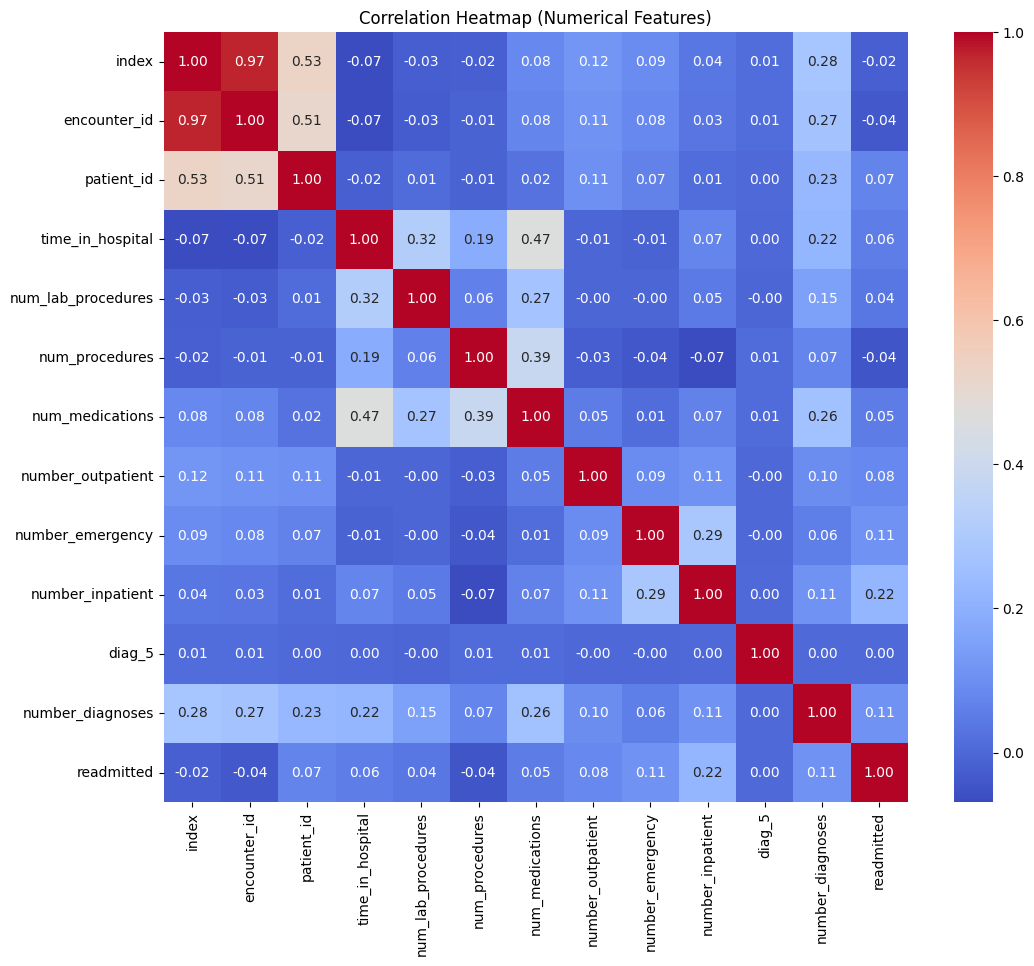

In [8]:
numeric_df = train_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [9]:
train_df.isnull().sum()

,0
index,0
encounter_id,0
patient_id,0
race,1114
gender,0
age,0
weight,47354
time_in_hospital,0
medical_specialty,23983
num_lab_procedures,0


3.4 Checking missing value percentages

In [10]:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100

In [11]:
print("\n--- Missing Values Percentage ---")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))


--- Missing Values Percentage ---
weight               96.816667
X1                   94.743514
X2                   83.257345
medical_specialty    49.033960
race                  2.277606
diag_4                1.400503
diag_3                1.400503
diag_2                0.351659
diag_1                0.022490
dtype: float64


3.5 Visualizing the missing values.

/tmp/ipython-input-2035295855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')


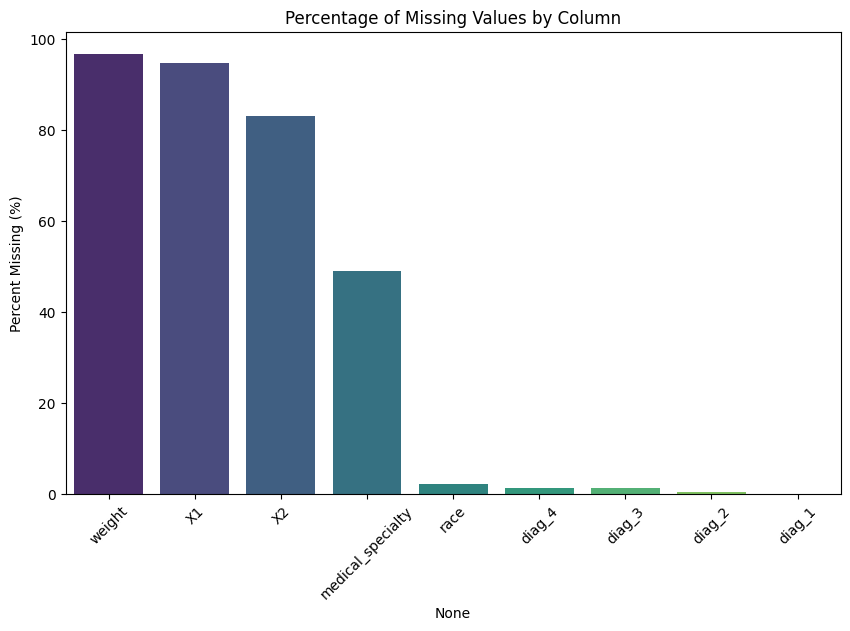

Exact Missing Percentages:
weight               96.816667
X1                   94.743514
X2                   83.257345
medical_specialty    49.033960
race                  2.277606
diag_4                1.400503
diag_3                1.400503
diag_2                0.351659
diag_1                0.022490
dtype: float64


In [12]:
missing_percentage = train_df.isnull().sum() / len(train_df) * 100

# Filter to show only columns that actually have missing data
missing_data = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Create a Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='viridis')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percent Missing (%)')
plt.xticks(rotation=45) # Rotate labels so they are readable
plt.show()

# Print the exact numbers to be sure
print("Exact Missing Percentages:")
print(missing_data)

In [13]:
train_df.isnull().sum()

,0
index,0
encounter_id,0
patient_id,0
race,1114
gender,0
age,0
weight,47354
time_in_hospital,0
medical_specialty,23983
num_lab_procedures,0


In [14]:
train_df_copy=train_df.copy() #Make a copy of

#4. SMART IMPUTATION

In [15]:
def smart_fill(df):
    # 1. Fill 'medical_specialty' based on 'age' (Grouped Imputation)
    df['medical_specialty'] = df.groupby('age')['medical_specialty'].transform(
        lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Missing')
    )
    df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')

    # 2. Fill 'race' with Mode
    df['race'] = df['race'].fillna(df['race'].mode()[0])

    # 3. Fill diagnoses with "Missing"
    for col in ['diag_1', 'diag_2', 'diag_3', 'diag_4', 'diag_5']:
        if col in df.columns:
            df[col] = df[col].fillna('Missing')
    return df

print("Applying Smart Imputation...")
train_df = smart_fill(train_df)
test_df = smart_fill(test_df)

Applying Smart Imputation...


In [16]:
train_df.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),NaN,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),NaN,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),NaN,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),NaN,5,InternalMedicine,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),NaN,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [18]:
train_df['medical_specialty'].isnull().sum()

np.int64(0)

#5. Dropping Columns

In [19]:
cols_to_drop = ['weight', 'X1', 'X2']
train_df = train_df.drop(columns=[c for c in cols_to_drop if c in train_df.columns])
test_df = test_df.drop(columns=[c for c in cols_to_drop if c in test_df.columns], errors='ignore')

print(f"Dropped empty columns: {cols_to_drop}")
print("Kept IDs for further visualization.")

Dropped empty columns: ['weight', 'X1', 'X2']
Kept IDs for further visualization.


#6. FEATURE ENGINEERING

In [20]:
def engineer_features(df):
    # Age Map
    age_map = {'[0-10)':5, '[10-20)':15, '[20-30)':25, '[30-40)':35,
               '[40-50)':45, '[50-60)':55, '[60-70)':65, '[70-80)':75,
               '[80-90)':85, '[90-100)':95}
    if df['age'].dtype == 'object':
        df['age'] = df['age'].map(age_map)

    # Total Visits (Power Feature)
    df['total_visits'] = (df['number_inpatient'] + df['number_outpatient'] + df['number_emergency'])

    # Binary Encoding
    if 'change' in df.columns:
        df['change'] = df['change'].apply(lambda x: 1 if x == 'Ch' else 0)
    if 'diabetesMed' in df.columns:
        df['diabetesMed'] = df['diabetesMed'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Label Encode remaining categories
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

    return df

print("Engineering features...")
train_df_clean = engineer_features(train_df.copy())
test_df_clean = engineer_features(test_df.copy())

Engineering features...


#7. DATA VISUALISATION

7.1 Most Visits by a patient.

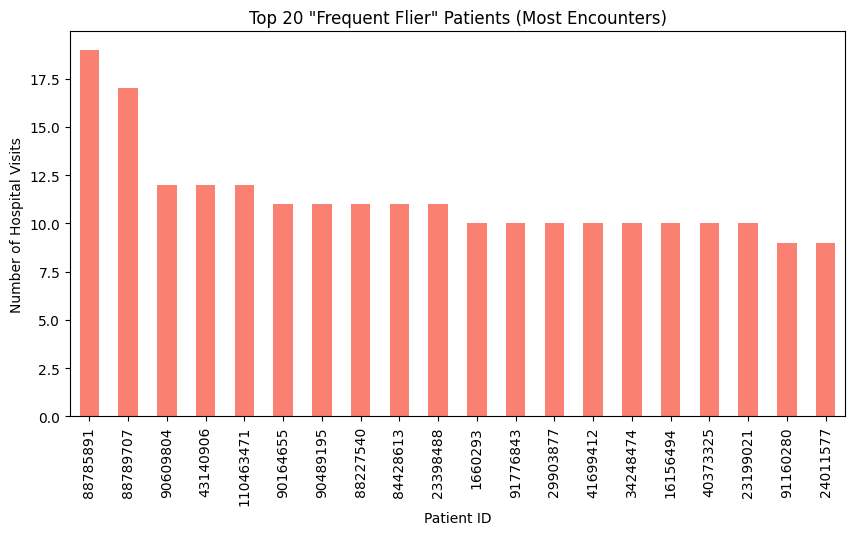

Max visits by one patient: 19


In [21]:
patient_counts = train_df['patient_id'].value_counts()

plt.figure(figsize=(10, 5))
# Plot only top 20 most frequent patients
patient_counts.head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 "Frequent Flier" Patients (Most Encounters)')
plt.xlabel('Patient ID')
plt.ylabel('Number of Hospital Visits')
plt.show()

print(f"Max visits by one patient: {patient_counts.max()}")

7.2 Which Medical Specialties have the highest Readmission Risk?

In [22]:
sns.set_style("whitegrid")

/tmp/ipython-input-3540600534.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_specialties.values, y=top_specialties.index, palette='magma')


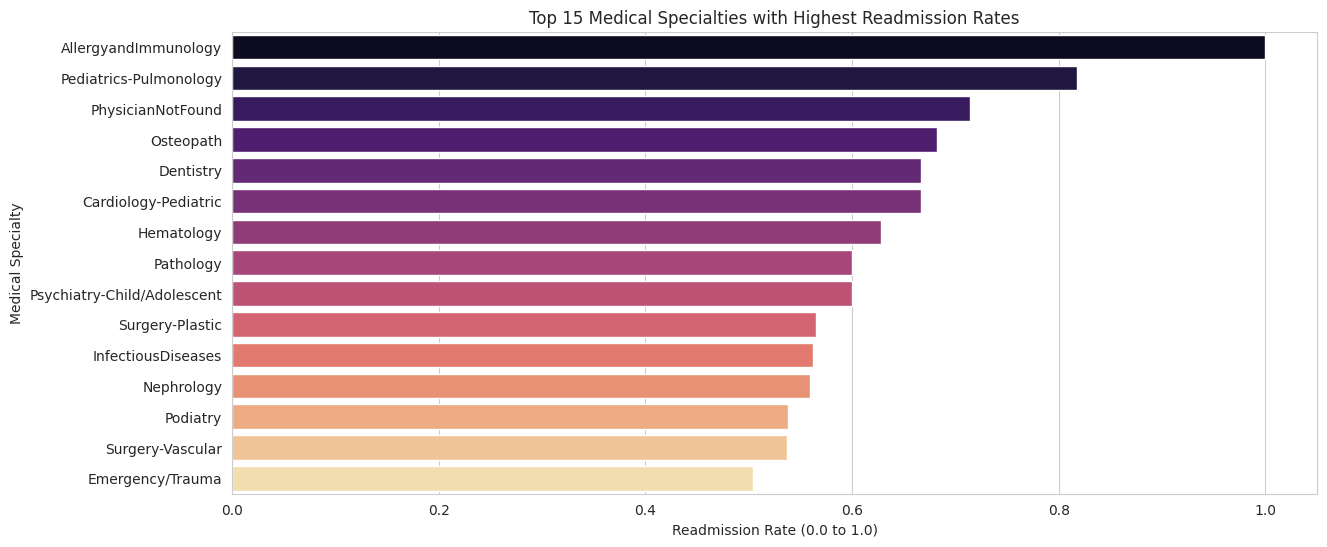

In [24]:
plt.figure(figsize=(14, 6))
# Calculate readmission rate per specialty
specialty_rates = train_df.groupby('medical_specialty')['readmitted'].mean().sort_values(ascending=False)
# Get top 15 specialties with highest risk
top_specialties = specialty_rates.head(15)

sns.barplot(x=top_specialties.values, y=top_specialties.index, palette='magma')
plt.title('Top 15 Medical Specialties with Highest Readmission Rates')
plt.xlabel('Readmission Rate (0.0 to 1.0)')
plt.ylabel('Medical Specialty')
plt.show()

In [25]:
train_df.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),4,Emergency/Trauma,39,1,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),3,Emergency/Trauma,34,1,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),6,Nephrology,50,2,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),5,InternalMedicine,63,0,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),9,Psychiatry,17,1,...,No,No,No,No,No,No,No,No,No,1


7.3 Does "Time in Hospital" + "Lab Procedures" matter?

/tmp/ipython-input-3903839658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], x='readmitted', y='time_in_hospital', data=train_df, palette='coolwarm')
/tmp/ipython-input-3903839658.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='readmitted', y='num_lab_procedures', data=train_df, palette='coolwarm')


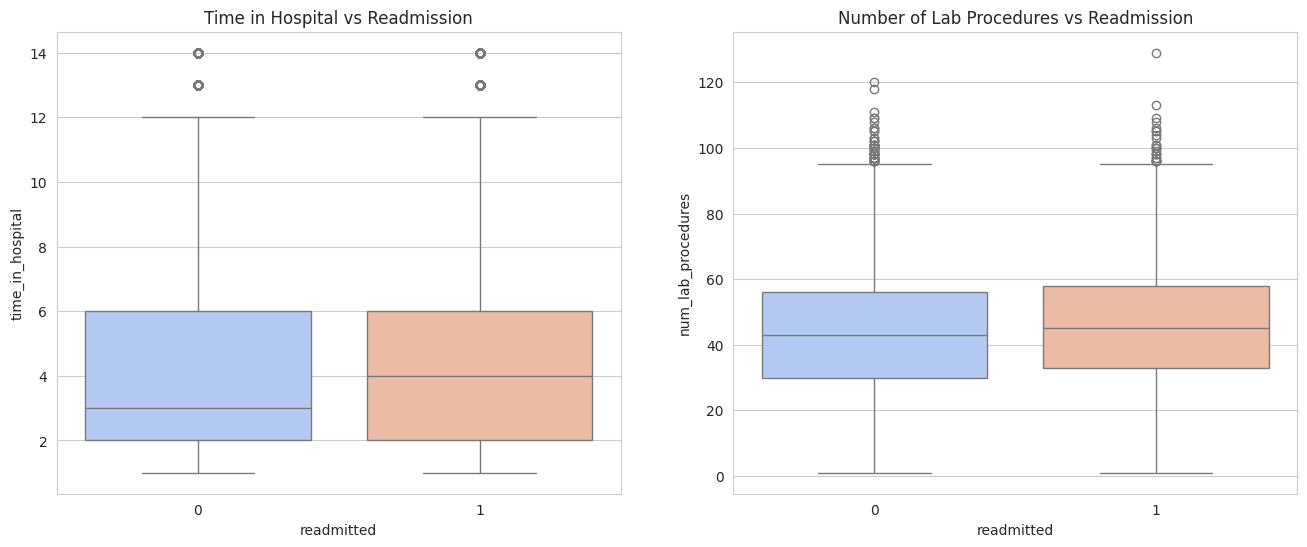

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot for Time in Hospital
sns.boxplot(ax=axes[0], x='readmitted', y='time_in_hospital', data=train_df, palette='coolwarm')
axes[0].set_title('Time in Hospital vs Readmission')

# Boxplot for Num Lab Procedures
sns.boxplot(ax=axes[1], x='readmitted', y='num_lab_procedures', data=train_df, palette='coolwarm')
axes[1].set_title('Number of Lab Procedures vs Readmission')
plt.show()

7.4 Impact of Medication Change

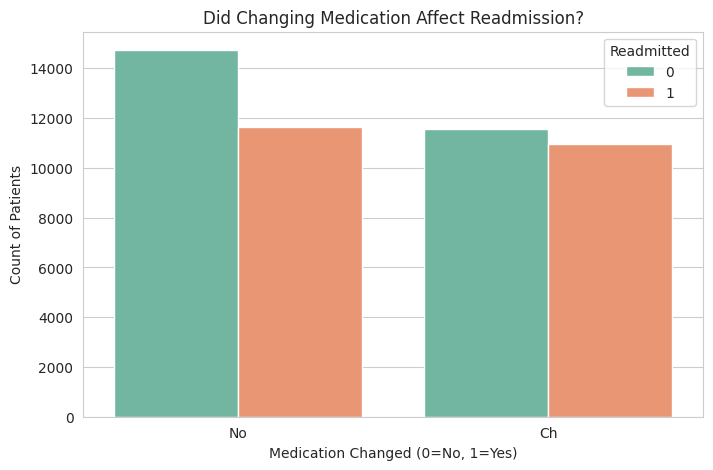

In [27]:
plt.figure(figsize=(8, 5))
# We use the 'change' column (0=No, 1=Yes)
sns.countplot(x='change', hue='readmitted', data=train_df, palette='Set2')
plt.title('Did Changing Medication Affect Readmission?')
plt.xlabel('Medication Changed (0=No, 1=Yes)')
plt.ylabel('Count of Patients')
plt.legend(title='Readmitted', loc='upper right')
plt.show()

7.5 Race & Gender Breakdown

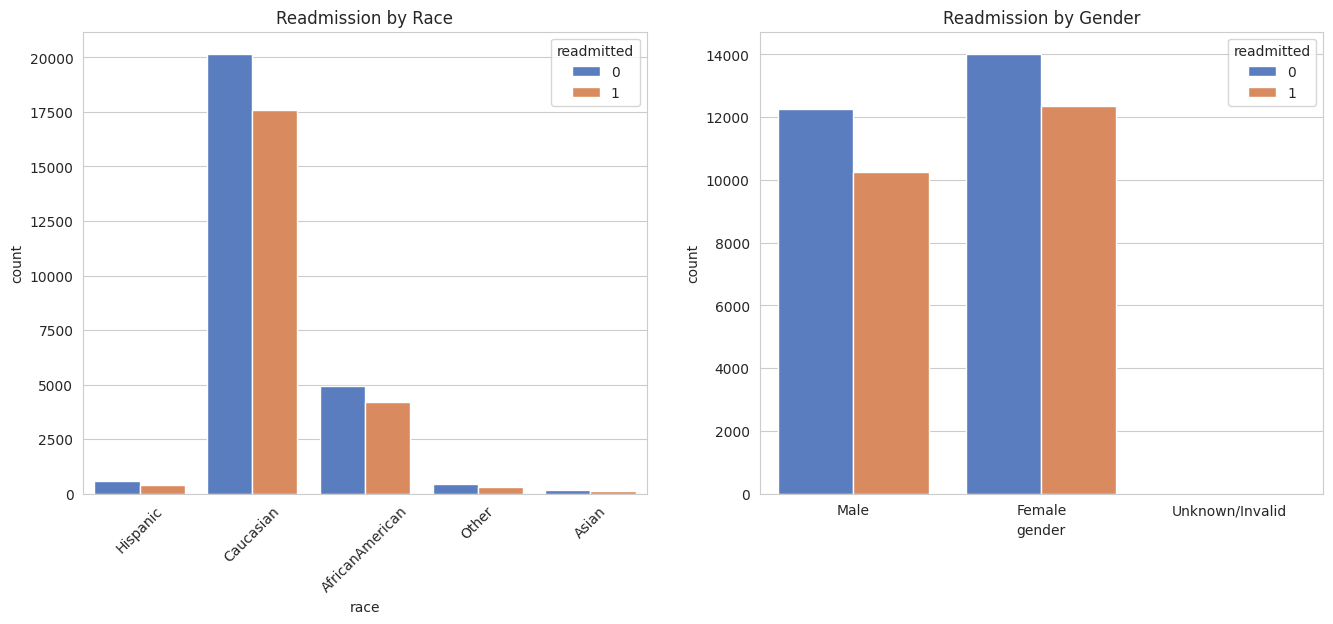

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Race
sns.countplot(ax=axes[0], x='race', hue='readmitted', data=train_df, palette='muted')
axes[0].set_title('Readmission by Race')
axes[0].tick_params(axis='x', rotation=45)

# Gender
sns.countplot(ax=axes[1], x='gender', hue='readmitted', data=train_df, palette='muted')
axes[1].set_title('Readmission by Gender')
plt.show()

7.6 Service Utilization (The "Total Visits" we created)

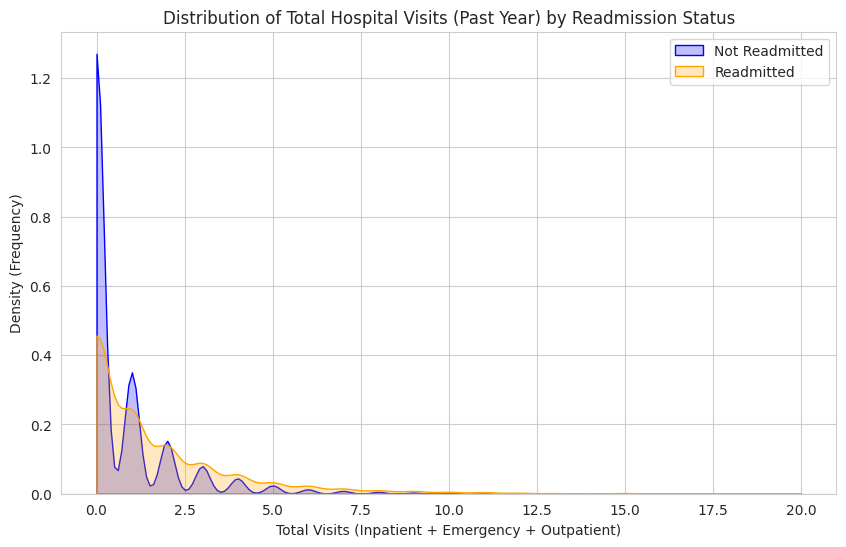

In [30]:
# 1. First, create the column in the dataframe we are using for plotting
train_df['total_visits'] = (train_df['number_inpatient'] +
                            train_df['number_outpatient'] +
                            train_df['number_emergency'])

# 2. Now draw the plot
plt.figure(figsize=(10, 6))

# We use KDE plot to show the "shape" of the data
sns.kdeplot(data=train_df[train_df['readmitted']==0]['total_visits'],
            label='Not Readmitted', fill=True, clip=(0,20), color='blue')

sns.kdeplot(data=train_df[train_df['readmitted']==1]['total_visits'],
            label='Readmitted', fill=True, clip=(0,20), color='orange')

plt.title('Distribution of Total Hospital Visits (Past Year) by Readmission Status')
plt.xlabel('Total Visits (Inpatient + Emergency + Outpatient)')
plt.ylabel('Density (Frequency)')
plt.legend()
plt.show()

In [31]:
train_df.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted,total_visits
0,69375,197029140,51521940,Hispanic,Male,[80-90),4,Emergency/Trauma,39,1,...,No,No,No,No,No,No,No,Yes,1,6
1,57272,163571946,92631357,Caucasian,Male,[60-70),3,Emergency/Trauma,34,1,...,No,No,No,No,No,No,No,No,0,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),6,Nephrology,50,2,...,Down,No,No,No,No,No,Ch,Yes,1,5
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),5,InternalMedicine,63,0,...,Down,No,No,No,No,No,Ch,Yes,1,0
4,24091,81873900,23464296,Caucasian,Male,[70-80),9,Psychiatry,17,1,...,No,No,No,No,No,No,No,No,1,0


In [32]:
train_df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed', 'readmitted', 'total_visits'],
      dtype='object')

In [33]:
test_df.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,X18,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed
0,11128,46325466,3928383,Caucasian,Female,[70-80),3,InternalMedicine,45,3,...,No,No,No,No,No,No,No,No,No,Yes
1,79758,245219616,60926103,Caucasian,Male,[60-70),2,InternalMedicine,10,1,...,No,No,No,No,No,No,No,No,No,Yes
2,52497,155321232,25234848,AfricanAmerican,Male,[70-80),11,InternalMedicine,41,1,...,No,No,Steady,No,No,No,No,No,No,Yes
3,64504,179491944,86935374,Caucasian,Female,[70-80),1,InternalMedicine,71,2,...,No,No,No,No,No,No,No,No,No,No
4,987,7425954,2486826,AfricanAmerican,Female,[50-60),7,InternalMedicine,59,2,...,No,No,Steady,No,No,No,No,No,Ch,Yes


In [34]:
test_df.columns

Index(['index', 'encounter_id', 'patient_id', 'race', 'gender', 'age',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'diag_4', 'diag_5', 'number_diagnoses', 'X3', 'X4', 'X5', 'X6', 'X7',
       'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'change',
       'diabetesMed'],
      dtype='object')